In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [42]:
pumpkins  =pd.read_csv("/kaggle/input/pumpkins/US-pumpkins.csv")

In [43]:
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [44]:
pumpkins.describe()

,Grade,Low Price,High Price,Mostly Low,Mostly High,Environment,Quality,Condition,Appearance,Storage,Crop,Trans Mode,Unnamed: 24
count,0.0,1757.000000,1757.000000,1654.000000,1654.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,124.571338,132.970939,128.170550,132.491802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,83.876591,89.524958,86.512161,88.442967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.240000,0.240000,0.240000,0.240000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,24.000000,24.500000,24.625000,26.125000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,140.000000,150.000000,147.000000,150.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,180.000000,200.000000,185.000000,200.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,480.000000,480.000000,480.000000,480.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
print("Size :", pumpkins.shape)
print("dimensions : ",pumpkins.ndim)
print("features : ",pumpkins.columns)

Size : (1757, 26)
dimensions :  2
features :  Index(['City Name', 'Type', 'Package', 'Variety', 'Sub Variety', 'Grade',
       'Date', 'Low Price', 'High Price', 'Mostly Low', 'Mostly High',
       'Origin', 'Origin District', 'Item Size', 'Color', 'Environment',
       'Unit of Sale', 'Quality', 'Condition', 'Appearance', 'Storage', 'Crop',
       'Repack', 'Trans Mode', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')


In [46]:
pumpkins.isnull().sum()

City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64

In [47]:
features_need = []

for feature in pumpkins.columns:
    if(pumpkins[feature].isnull().sum() < 300):
        features_need.append(feature)
    
    
features_need

['City Name',
 'Package',
 'Variety',
 'Date',
 'Low Price',
 'High Price',
 'Mostly Low',
 'Mostly High',
 'Origin',
 'Item Size',
 'Repack']

In [48]:
columns_to_select = ['Package', 'Low Price', 'High Price', 'Date', 'Variety']
pumpkins = pumpkins.loc[:, columns_to_select]
pumpkins.head()

,Package,Low Price,High Price,Date,Variety
0,24 inch bins,270.0,280.0,4/29/17,NaN
1,24 inch bins,270.0,280.0,5/6/17,NaN
2,24 inch bins,160.0,160.0,9/24/16,HOWDEN TYPE
3,24 inch bins,160.0,160.0,9/24/16,HOWDEN TYPE
4,24 inch bins,90.0,100.0,11/5/16,HOWDEN TYPE


In [49]:
pumpkins['AvgPrice'] = (pumpkins['Low Price'] + pumpkins['High Price']) / 2;
pumpkins['Month'] = pd.DatetimeIndex(pumpkins['Date']).month
pumpkins.head()

,Package,Low Price,High Price,Date,Variety,AvgPrice,Month
0,24 inch bins,270.0,280.0,4/29/17,NaN,275.0,4
1,24 inch bins,270.0,280.0,5/6/17,NaN,275.0,5
2,24 inch bins,160.0,160.0,9/24/16,HOWDEN TYPE,160.0,9
3,24 inch bins,160.0,160.0,9/24/16,HOWDEN TYPE,160.0,9
4,24 inch bins,90.0,100.0,11/5/16,HOWDEN TYPE,95.0,11


In [50]:
new_df = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]
new_df.head()

,Package,Low Price,High Price,Date,Variety,AvgPrice,Month
70,1 1/9 bushel cartons,15.0,15.0,9/24/16,PIE TYPE,15.0,9
71,1 1/9 bushel cartons,18.0,18.0,9/24/16,PIE TYPE,18.0,9
72,1 1/9 bushel cartons,18.0,18.0,10/1/16,PIE TYPE,18.0,10
73,1 1/9 bushel cartons,17.0,17.0,10/1/16,PIE TYPE,17.0,10
74,1 1/9 bushel cartons,15.0,15.0,10/8/16,PIE TYPE,15.0,10


In [51]:
new_df.loc[pumpkins['Package'].str.contains('1 1/9'), 'Price'] = pumpkins['AvgPrice']/(1 + 1/9)

new_df.loc[pumpkins['Package'].str.contains('1/2'), 'Price'] = pumpkins['AvgPrice']/(1/2)

new_df.head()

/tmp/ipykernel_34/342732018.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc[pumpkins['Package'].str.contains('1 1/9'), 'Price'] = pumpkins['AvgPrice']/(1 + 1/9)


,Package,Low Price,High Price,Date,Variety,AvgPrice,Month,Price
70,1 1/9 bushel cartons,15.0,15.0,9/24/16,PIE TYPE,15.0,9,13.5
71,1 1/9 bushel cartons,18.0,18.0,9/24/16,PIE TYPE,18.0,9,16.2
72,1 1/9 bushel cartons,18.0,18.0,10/1/16,PIE TYPE,18.0,10,16.2
73,1 1/9 bushel cartons,17.0,17.0,10/1/16,PIE TYPE,17.0,10,15.3
74,1 1/9 bushel cartons,15.0,15.0,10/8/16,PIE TYPE,15.0,10,13.5


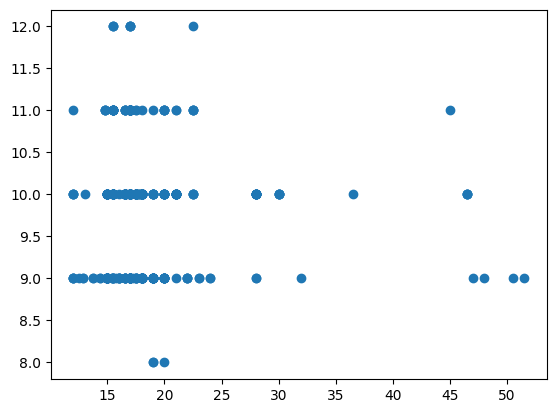

In [52]:
plt.scatter(new_df.AvgPrice, new_df.Month)
plt.show()

<Axes: title={'center': 'Highest Price and Respective month'}, xlabel='Month', ylabel='Price'>

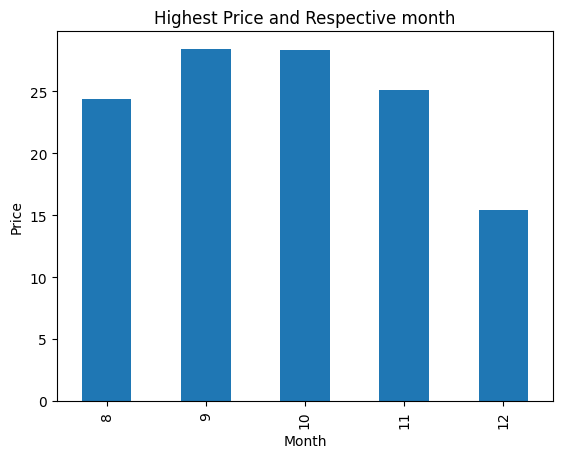

In [53]:
new_df.groupby(['Month'])['Price'].mean().plot(kind = 'bar' , title = 'Highest Price and Respective month' , xlabel = 'Month' , ylabel = 'Price')

In [54]:
from datetime import datetime
new_df['day_of_year'] = pd.to_datetime(new_df['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)
new_df.head()

/tmp/ipykernel_34/498035967.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  new_df['day_of_year'] = pd.to_datetime(new_df['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)
/tmp/ipykernel_34/498035967.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['day_of_year'] = pd.to_datetime(new_df['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)


,Package,Low Price,High Price,Date,Variety,AvgPrice,Month,Price,day_of_year
70,1 1/9 bushel cartons,15.0,15.0,9/24/16,PIE TYPE,15.0,9,13.5,267
71,1 1/9 bushel cartons,18.0,18.0,9/24/16,PIE TYPE,18.0,9,16.2,267
72,1 1/9 bushel cartons,18.0,18.0,10/1/16,PIE TYPE,18.0,10,16.2,274
73,1 1/9 bushel cartons,17.0,17.0,10/1/16,PIE TYPE,17.0,10,15.3,274
74,1 1/9 bushel cartons,15.0,15.0,10/8/16,PIE TYPE,15.0,10,13.5,281


In [55]:
print(new_df['Month'].corr(new_df['Price']))
print(new_df['day_of_year'].corr(new_df['Price']))

-0.15301753342343635
-0.18091690190515375


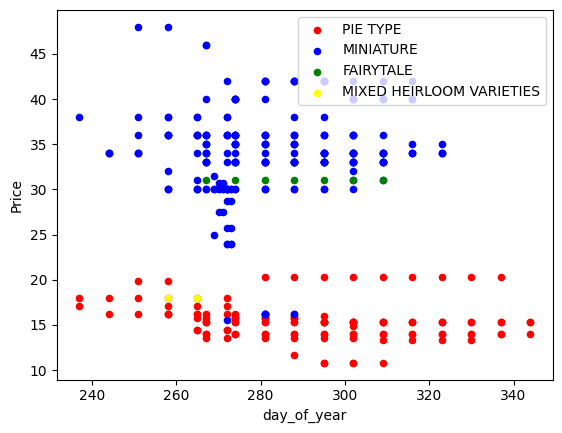

In [61]:
ax=None
colors = ['red','blue','green','yellow','black']
for i,var in enumerate(new_df['Variety'].unique()):
    df = new_df[new_df['Variety']==var]
    ax = df.plot.scatter('day_of_year','Price',ax=ax,c=colors[i],label=var)

<Axes: xlabel='Variety'>

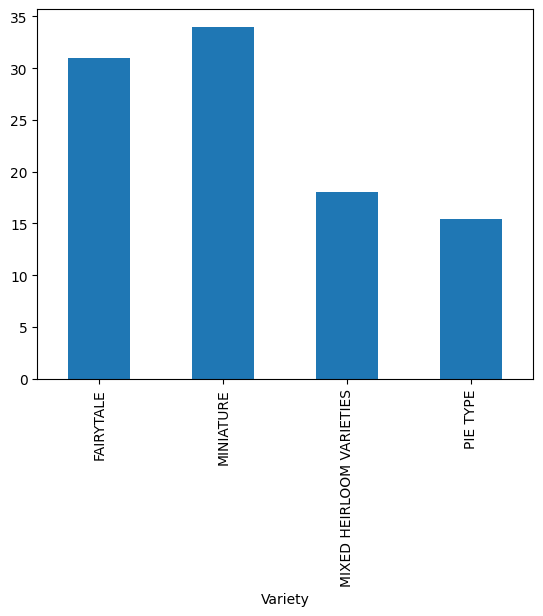

In [63]:
new_df.groupby('Variety')['Price'].mean().plot(kind='bar')

<Axes: xlabel='day_of_year', ylabel='Price'>

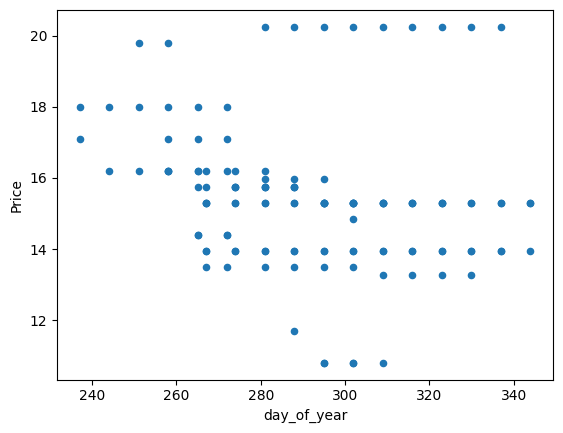

In [64]:
pie_pumpkins = new_df[new_df['Variety']=='PIE TYPE']
pie_pumpkins.plot.scatter('day_of_year','Price') 

In [65]:
pie_pumpkins.dropna(inplace=True)
pie_pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125 entries, 70 to 1630
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Package      125 non-null    object 
 1   Low Price    125 non-null    float64
 2   High Price   125 non-null    float64
 3   Date         125 non-null    object 
 4   Variety      125 non-null    object 
 5   AvgPrice     125 non-null    float64
 6   Month        125 non-null    int32  
 7   Price        125 non-null    float64
 8   day_of_year  125 non-null    int64  
dtypes: float64(4), int32(1), int64(1), object(3)
memory usage: 9.3+ KB


/tmp/ipykernel_34/3144308612.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pie_pumpkins.dropna(inplace=True)


In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X = pie_pumpkins['day_of_year'].to_numpy().reshape(-1,1)
y = pie_pumpkins['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)


LinearRegression()

In [78]:
pred = lin_reg.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

Mean error: 2.23 (14.5%)


In [79]:
score = lin_reg.score(X_train,y_train)
print('Model determination: ', score)

Model determination:  0.047853413576900206


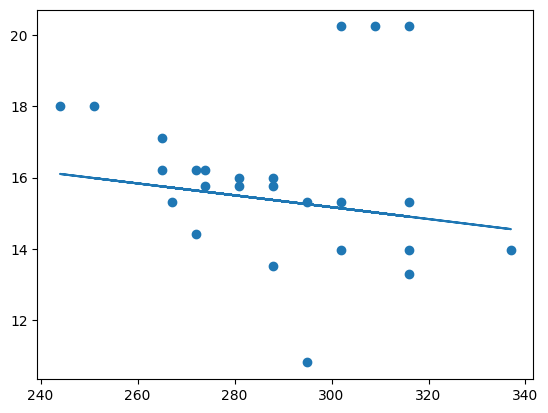

In [80]:
plt.scatter(X_test,y_test)
plt.plot(X_test,pred)

In [95]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())

pipeline.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

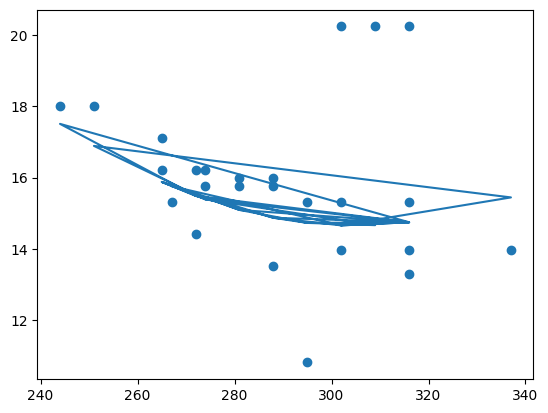

In [97]:
plt.scatter(X_test,y_test)
plt.plot(X_test,pipeline.predict(X_test))

# Using Logistic

In [103]:
pumpkins = pd.read_csv('/kaggle/input/pumpkins/US-pumpkins.csv')

In [104]:
from sklearn.preprocessing import LabelEncoder

new_columns = ['Color','Origin','Item Size','Variety','City Name','Package']

new_pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)

new_pumpkins.dropna(inplace=True)

new_pumpkins = new_pumpkins.apply(LabelEncoder().fit_transform)

In [105]:
new_pumpkins.head()

,City Name,Package,Variety,Origin,Item Size,Color
2,1,3,4,3,3,0
3,1,3,4,17,3,0
4,1,3,4,5,2,0
5,1,3,4,5,2,0
6,1,4,4,5,3,0


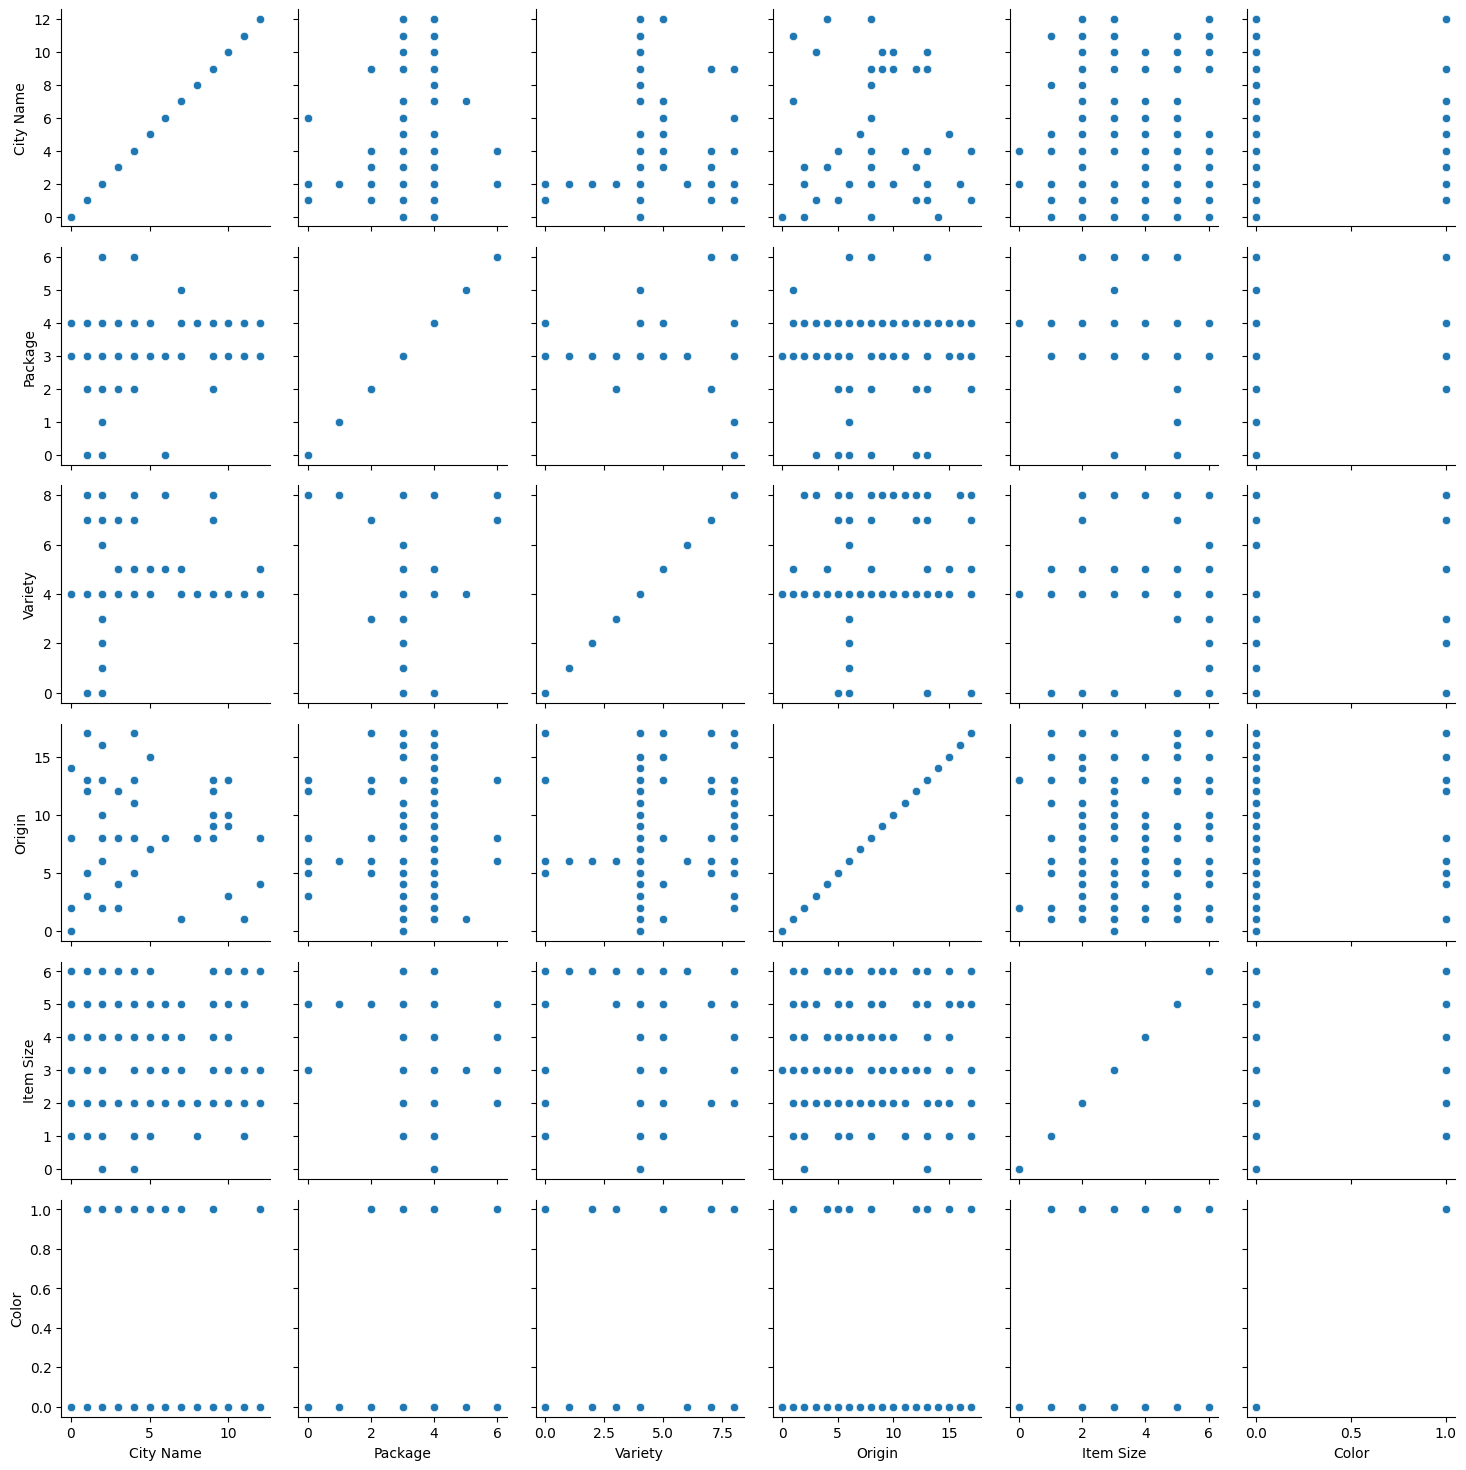

In [106]:
import seaborn as sns

g = sns.PairGrid(new_pumpkins)
g.map(sns.scatterplot)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 63.4% of the points cannot be placed; you may want to decrease the size of the mar

<Axes: xlabel='Color', ylabel='Item Size'>

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 79.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 35.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


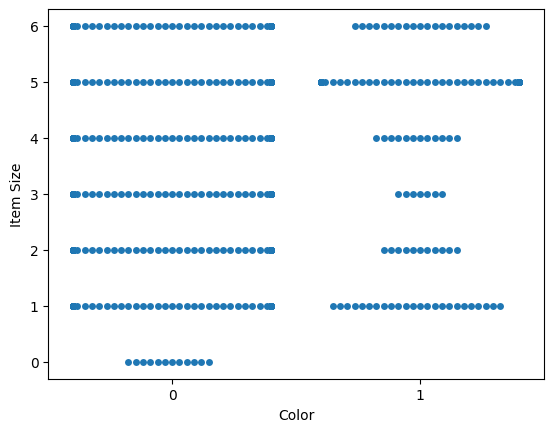

In [107]:
sns.swarmplot(x="Color", y="Item Size", data=new_pumpkins)

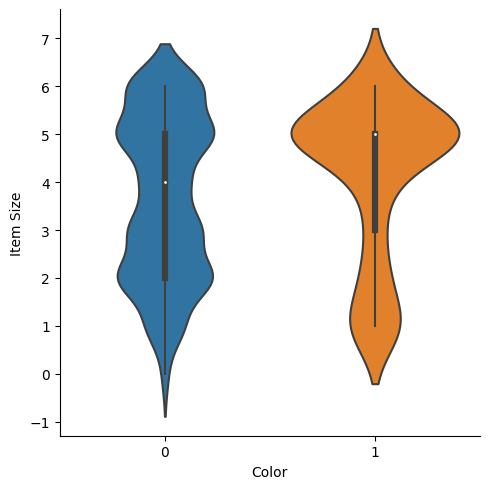

In [108]:
sns.catplot(x="Color", y="Item Size",
            kind="violin", data=new_pumpkins)

In [109]:
from sklearn.model_selection import train_test_split

Selected_features = ['Origin','Item Size','Variety','City Name','Package']

X = new_pumpkins[Selected_features]
y = new_pumpkins['Color']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))
print('Predicted labels: ', predictions)
print('Accuracy: ', accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90       166
           1       0.00      0.00      0.00        33

    accuracy                           0.81       199
   macro avg       0.42      0.49      0.45       199
weighted avg       0.69      0.81      0.75       199

Predicted labels:  [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
Accuracy:  0.8140703517587939


In [111]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[162,   4],
       [ 33,   0]])

In [119]:
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

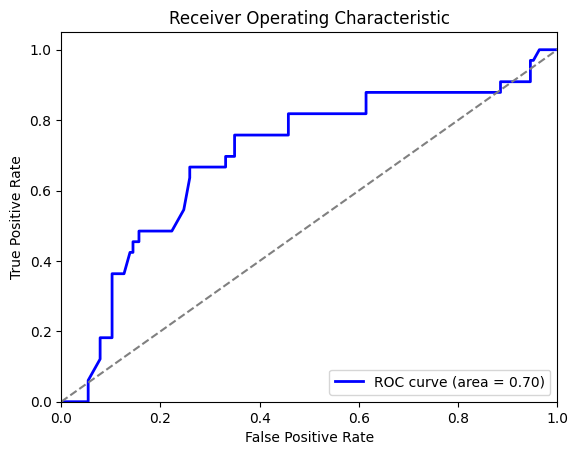

In [121]:
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [117]:
auc = roc_auc_score(y_test,y_scores[:,1])
print(auc)

0.6976998904709748
